In [130]:
try:
    # if this notebook is being called by another one
    # used passed gene_name value
    gene_name
    enriched_test
except:
    # otherwise, set value to amacGFP / avGFP / cgreGFP / ppluGFP,
    # for instance for debugging here
    gene_name="avGFP"
    enriched_test=False

working_folder = 'top5_covariance'


In [131]:
if not gene_name.endswith("GFP"):
    gene_name = gene_name+"GFP"

In [132]:
# if load_encodings (boolean)
# exists and is False, encodings won't be loaded
# if not defined or not False, load encodings
try:
    load_encodings
    if load_encodings != False:
        load_encodings = True
except:
    load_encodings = True

Import modules
Define functions
Load avGFP data
avGFP 239 aa


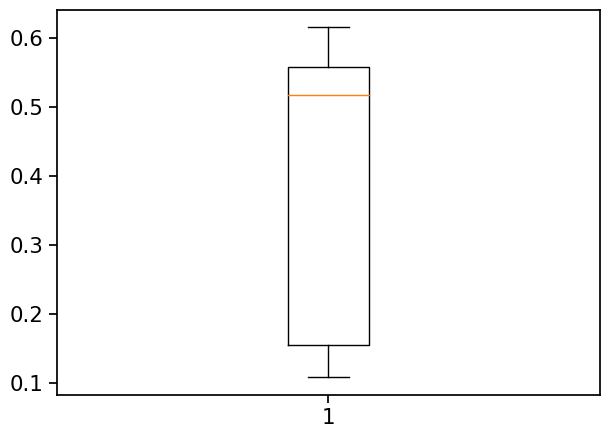

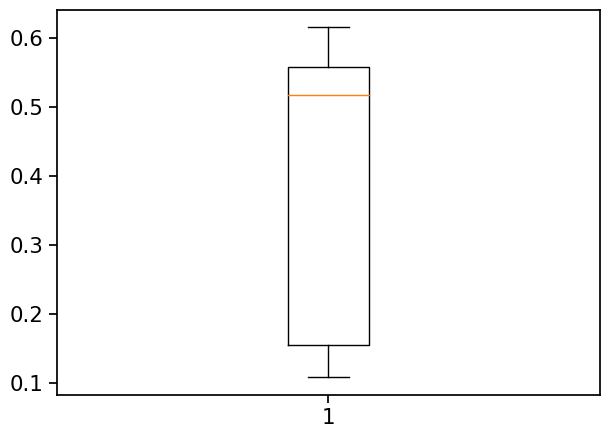

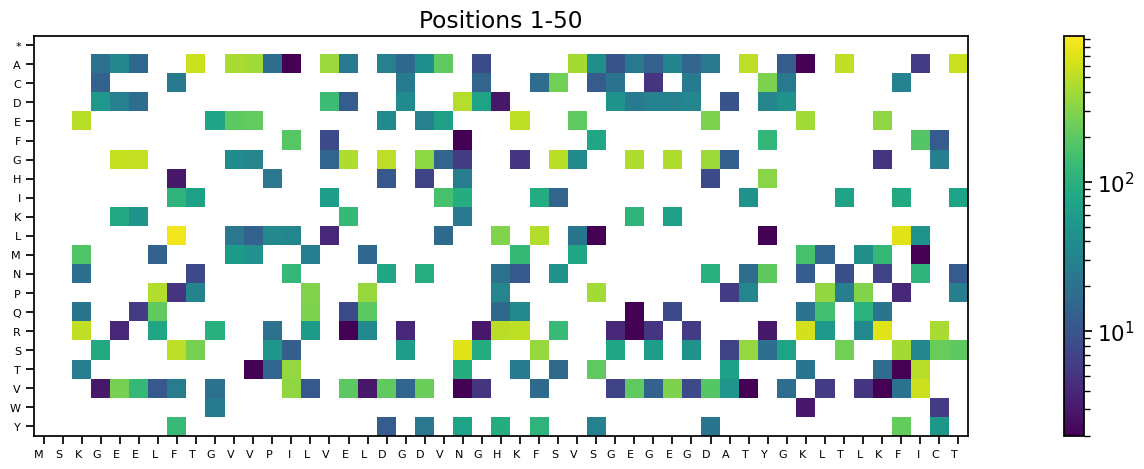

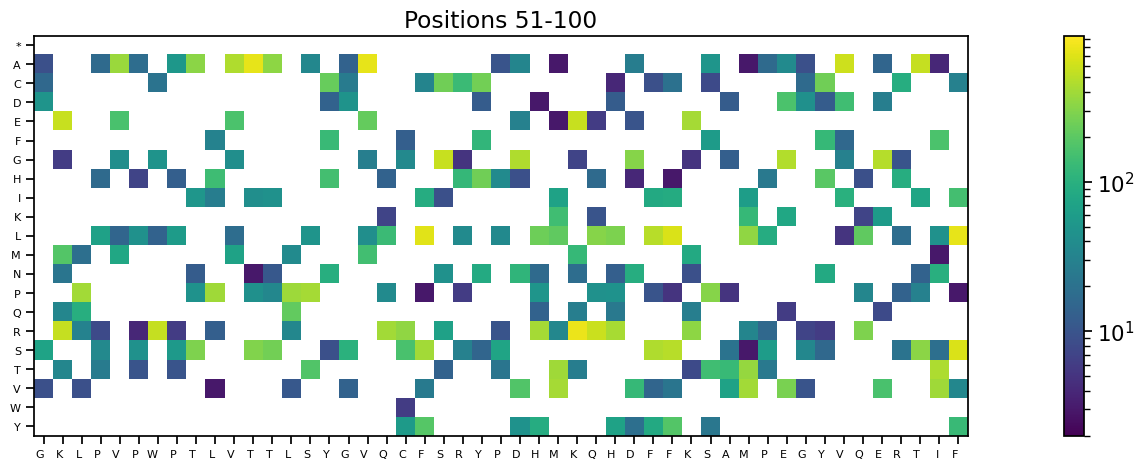

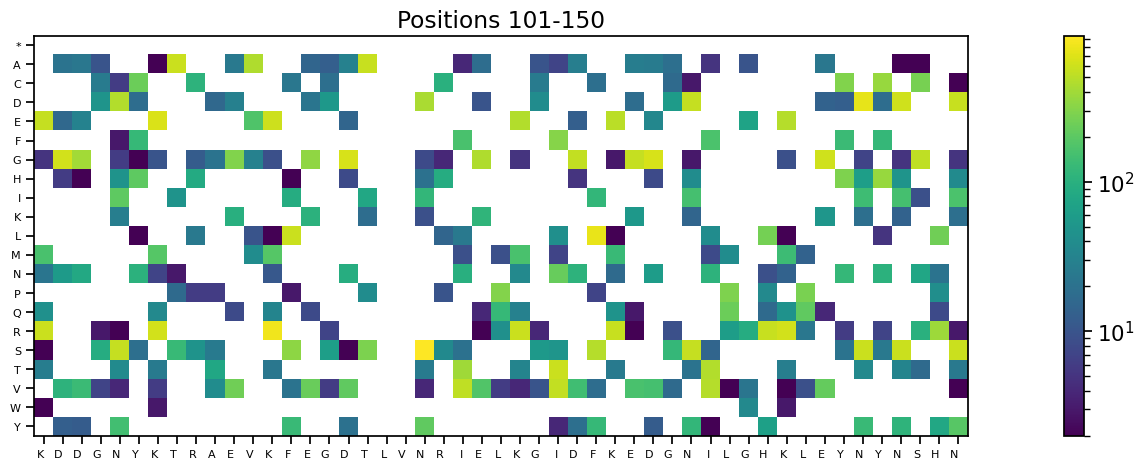

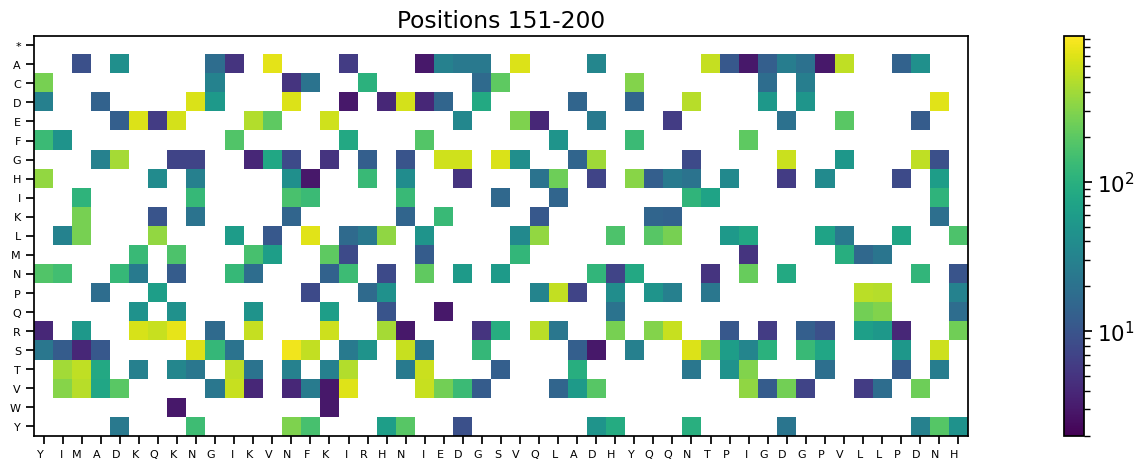

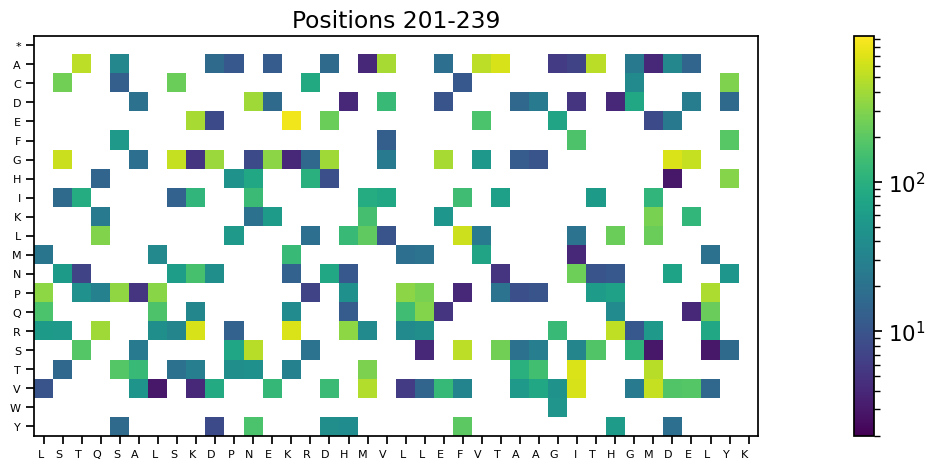

In [133]:
%run 01_Load_data.ipynb


In [135]:
# function to reverse oneHot encoding, making sure everything is OK
def one_hot_to_seq(df):

    seqs = []
    cols = df.columns
    for index, row in df.iterrows():
        seq = str()
        for i in range(len(row)):
            if row[i] == 1:
                seq = seq+cols[i][-1]

        seqs.append(seq)

    seqs = pd.DataFrame(seqs, columns=["rebuilt_seq"])
    return(seqs)


PREPROCESING

In [136]:
brightness_col = 'medianBrightness'

In [137]:
df["full_seq"] = get_seq_from_genotype.fit_transform(df)
df['full_seq'] = df['full_seq'].str[:-1]
df.loc[0,'full_seq']

'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'

In [140]:
wt_seq = df.loc[0,'full_seq']

In [143]:
seqs = df['full_seq']

0        MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
1        MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
2        MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
3        MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
4        MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
                               ...                        
54020    MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
54021    MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
54022    MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
54023    MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
54024    MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
Name: full_seq, Length: 51715, dtype: object

In [182]:
def mutations_encoding(seq, wt_seq):
    encoded=''
    for i, aa in enumerate(seq):
        if seq[i] == wt_seq[i]:
            encoded+='0'
            # print('wt')
            pass
        else:
            # print(i)
            encoded+='1'
            # print('mutant')
    return encoded

## sort and select positions

In [164]:
df_sorted = df.sort_values(brightness_col, ascending=False)
df_sorted

aaMutations  medianBrightness  \
43310                          T37S:K40R:N104S          4.123109   
22533                        K106R:V162G:N211S          4.114503   
23916                                    K157G          4.113576   
53369                          Y38N:T61A:Q156R          4.113576   
48709                              V162A:S174R          4.107867   
...                                        ...               ...   
10776                F26S:E33G:H76R:F82Y:D179G          1.289624   
7350                E33V:L43P:K78E:I187L:T224S          1.289350   
25703  K25E:E89G:T107A:I122T:L140R:M152V:Y236C          1.286571   
26105                           K25M:L63P:F98L          1.285992   
10393                         F26I:Q182R:K213R          1.283419   

                            aa_genotype_pseudo  \
43310                          T40S:K43R:N108S   
22533                        K110R:V166G:N218S   
23916                                    K161G   
53369                          Y41N:T64A:Q160R   
48709                              V166A:S178R   
...                                        ...   
10776                F29S:E36G:H79R:F85Y:D183G   
7350                E36V:L46P:K81E:I191L:T232S   
25703  K28E:E93G:T111A:I126T:L144R:M156V:Y244C   
26105                          K28M:L66P:F102L   
10393                         F29I:Q186R:K221R   

                                                full_seq  
43310  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDASYGRLTLKF...  
22533  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
23916  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
53369  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...  
48709  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
...                                                  ...  
10776  MSKGEELFTGVVPILVELDGDVNGHKSSVSGEGGGDATYGKLTLKF...  
7350   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTPKF...  
25703  MSKGEELFTGVVPILVELDGDVNGHEFSVSGEGEGDATYGKLTLKF...  
26105  MSKGEELFTGVVPILVELDGDVNGHMFSVSGEGEGDATYGKLTLKF...  
10393  MSKGEELFTGVVPILVELDGDVNGHKISVSGEGEGDATYGKLTLKF...  

[51715 rows x 4 columns]

In [165]:
# Calculate the number of rows to select (2% of the total rows)
num_rows_to_select = int(len(df_sorted) * 0.05)
# num_rows_to_select=10
# Select the first 2% of rows
subset_df = df_sorted.iloc[:num_rows_to_select]
subset_df = subset_df.reset_index(drop=True)
subset_df

aaMutations  medianBrightness aa_genotype_pseudo  \
0       T37S:K40R:N104S          4.123109    T40S:K43R:N108S   
1     K106R:V162G:N211S          4.114503  K110R:V166G:N218S   
2                 K157G          4.113576              K161G   
3       Y38N:T61A:Q156R          4.113576    Y41N:T64A:Q160R   
4           V162A:S174R          4.107867        V166A:S178R   
...                 ...               ...                ...   
2580        V175A:K208R          3.766202        V179A:K215R   
2581          T8S:I228T          3.766199         T11S:I236T   
2582         M77V:K161M          3.766165         M80V:K165M   
2583          L6Q:D154G          3.766140          L9Q:D158G   
2584         T49S:Y181C          3.766126         T52S:Y185C   

                                               full_seq  
0     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDASYGRLTLKF...  
1     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
3     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...  
4     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
...                                                 ...  
2580  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2581  MSKGEELFSGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2582  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2583  MSKGEEQFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2584  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  

[2585 rows x 4 columns]

Text(0, 0.5, 'brightness')

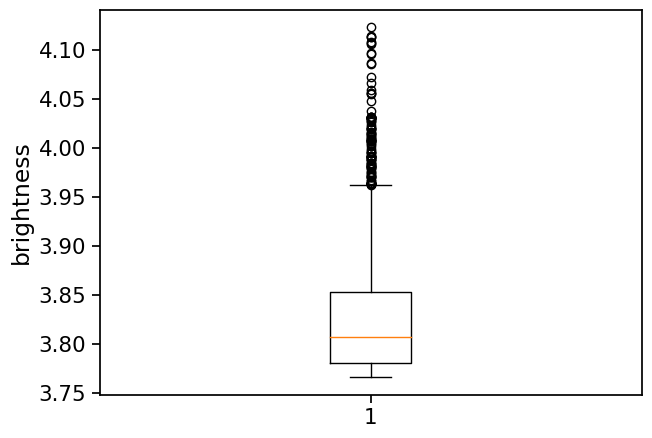

In [167]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('w')

plt.boxplot(subset_df[brightness_col])
plt.ylabel("brightness")
    

In [173]:
subset_df

aaMutations  medianBrightness aa_genotype_pseudo  \
0       T37S:K40R:N104S          4.123109    T40S:K43R:N108S   
1     K106R:V162G:N211S          4.114503  K110R:V166G:N218S   
2                 K157G          4.113576              K161G   
3       Y38N:T61A:Q156R          4.113576    Y41N:T64A:Q160R   
4           V162A:S174R          4.107867        V166A:S178R   
...                 ...               ...                ...   
2580        V175A:K208R          3.766202        V179A:K215R   
2581          T8S:I228T          3.766199         T11S:I236T   
2582         M77V:K161M          3.766165         M80V:K165M   
2583          L6Q:D154G          3.766140          L9Q:D158G   
2584         T49S:Y181C          3.766126         T52S:Y185C   

                                               full_seq  
0     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDASYGRLTLKF...  
1     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
3     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...  
4     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
...                                                 ...  
2580  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2581  MSKGEELFSGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2582  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2583  MSKGEEQFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2584  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  

[2585 rows x 4 columns]

In [183]:
#mutation encode subset df
for i, row in subset_df.iterrows():
    s = mutations_encoding(row['full_seq'], wt_seq)
    subset_df.loc[i,'mutation_enc'] = s
    subset_df.loc[i,'n_mutaions'] =  sum(int(char) for char in s)

In [261]:
subset_df['mutation_enc']

df_mutations = subset_df['mutation_enc'].apply(lambda x: pd.Series(list(x))).astype(int)

# Optionally, rename columns to reflect positions if necessary
df_mutations.columns = [f'Position_{i}{wt_seq[i]}' for i in df_mutations.columns]

In [262]:
df_mutations

Position_0M  Position_1S  Position_2K  Position_3G  Position_4E  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
2580            0            0            0            0            0   
2581            0            0            0            0            0   
2582            0            0            0            0            0   
2583            0            0            0            0            0   
2584            0            0            0            0            0   

      Position_5E  Position_6L  Position_7F  Position_8T  Position_9G  ...  \
0               0            0            0            0            0  ...   
1               0            0            0            0            0  ...   
2               0            0            0            0            0  ...   
3               0            0            0            0            0  ...   
4               0            0            0            0            0  ...   
...           ...          ...          ...          ...          ...  ...   
2580            0            0            0            0            0  ...   
2581            0            0            0            1            0  ...   
2582            0            0            0            0            0  ...   
2583            0            1            0            0            0  ...   
2584            0            0            0            0            0  ...   

      Position_228I  Position_229T  Position_230H  Position_231G  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
2580              0              0              0              0   
2581              1              0              0              0   
2582              0              0              0              0   
2583              0              0              0              0   
2584              0              0              0              0   

      Position_232M  Position_233D  Position_234E  Position_235L  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
2580              0              0              0              0   
2581              0              0              0              0   
2582              0              0              0              0   
2583              0              0              0              0   
2584              0              0              0              0   

      Position_236Y  Position_237K  
0                 0              0  
1                 0              0  
2                 0              0  
3                 0              0  
4                 0              0  
...             ...            ...  
2580              0              0  
2581              0              0  
2582              0              0  
2583              0              0  
2584              0              0  

[2585 rows x 238 columns]

In [263]:
covariance_matrix=df_mutations.cov()
covariance_matrix


Position_0M  Position_1S  Position_2K  Position_3G  \
Position_0M            0.0          0.0     0.000000     0.000000   
Position_1S            0.0          0.0     0.000000     0.000000   
Position_2K            0.0          0.0     0.023787     0.000330   
Position_3G            0.0          0.0     0.000330     0.002317   
Position_4E            0.0          0.0    -0.000622    -0.000059   
...                    ...          ...          ...          ...   
Position_233D          0.0          0.0    -0.000415    -0.000040   
Position_234E          0.0          0.0    -0.000151    -0.000051   
Position_235L          0.0          0.0    -0.000198     0.000331   
Position_236Y          0.0          0.0    -0.000528    -0.000050   
Position_237K          0.0          0.0     0.000000     0.000000   

               Position_4E  Position_5E  Position_6L  Position_7F  \
Position_0M       0.000000     0.000000     0.000000     0.000000   
Position_1S       0.000000     0.000000     0.000000     0.000000   
Position_2K      -0.000622    -0.000453     0.000585    -0.000217   
Position_3G      -0.000059    -0.000043    -0.000018    -0.000021   
Position_4E       0.024890     0.000300     0.000189     0.000160   
...                    ...          ...          ...          ...   
Position_233D    -0.000048    -0.000316     0.000255    -0.000152   
Position_234E    -0.000563    -0.000410    -0.000171    -0.000196   
Position_235L    -0.000226    -0.000446    -0.000186    -0.000213   
Position_236Y     0.000608     0.000372    -0.000168    -0.000193   
Position_237K     0.000000     0.000000     0.000000     0.000000   

               Position_8T  Position_9G  ...  Position_228I  Position_229T  \
Position_0M       0.000000     0.000000  ...       0.000000       0.000000   
Position_1S       0.000000     0.000000  ...       0.000000       0.000000   
Position_2K      -0.000094    -0.000066  ...       0.000388      -0.000188   
Position_3G      -0.000046    -0.000006  ...      -0.000074      -0.000055   
Position_4E      -0.000117    -0.000069  ...      -0.000810      -0.000216   
...                    ...          ...  ...            ...            ...   
Position_233D     0.000825    -0.000046  ...      -0.000153      -0.000015   
Position_234E    -0.000048    -0.000060  ...       0.000074      -0.000521   
Position_235L     0.000301    -0.000065  ...       0.000400      -0.000179   
Position_236Y    -0.000428    -0.000059  ...      -0.000300      -0.000124   
Position_237K     0.000000     0.000000  ...       0.000000       0.000000   

               Position_230H  Position_231G  Position_232M  Position_233D  \
Position_0M         0.000000       0.000000       0.000000       0.000000   
Position_1S         0.000000       0.000000       0.000000       0.000000   
Position_2K         0.000378      -0.000198      -0.001104      -0.000415   
Position_3G        -0.000038      -0.000019      -0.000105      -0.000040   
Position_4E        -0.000028      -0.000207      -0.001156      -0.000048   
...                      ...            ...            ...            ...   
Position_233D      -0.000277      -0.000138       0.000003       0.016738   
Position_234E       0.000029       0.000208      -0.000611       0.000012   
Position_235L      -0.000390       0.000192      -0.000699      -0.000021   
Position_236Y       0.000422      -0.000176      -0.000981       0.000405   
Position_237K       0.000000       0.000000       0.000000       0.000000   

               Position_234E  Position_235L  Position_236Y  Position_237K  
Position_0M         0.000000       0.000000       0.000000            0.0  
Position_1S         0.000000       0.000000       0.000000            0.0  
Position_2K        -0.000151      -0.000198      -0.000528            0.0  
Position_3G        -0.000051       0.000331      -0.000050            0.0  
Position_4E        -0.000563      -0.000226       0.000608            0.0  
...                      ...           

In [264]:

# Step 1: Mask the diagonal elements to avoid self-covariance
np.fill_diagonal(covariance_matrix.values, np.nan)

# Step 2: Find the top 20 highest absolute values in the covariance matrix
# Unstack the matrix to a long format where each row is a pair of variables
unstacked_cov = covariance_matrix.unstack()

# Drop NaN values (which are the diagonal elements we set to NaN)
filtered_cov = unstacked_cov.dropna()

# Sort by absolute values but keep the original sign of values
sorted_cov = filtered_cov.abs().sort_values(ascending=False)
# Convert index to frozenset (which is hashable and can be used in a pandas index)
sorted_cov.index = sorted_cov.index.map(frozenset)
# Now, drop duplicates
sorted_cov = sorted_cov[~sorted_cov.index.duplicated()]
sorted_cov.index = sorted_cov.index.map(lambda x: sorted(list(x)))


In [265]:
import pandas as pd
import itertools

# Assume df is your DataFrame

# Generating all column pairs without repetitions
column_pairs = list(itertools.combinations(df_mutations.columns, 2))

# Dictionary to store the counts of co-occurrences of 1s
co_occurrences = {}

# Counting co-occurrences of 1s for each pair
for col1, col2 in column_pairs:
    # We use the logical AND operation & to find rows where both columns are 1
    count = df_mutations[(df_mutations[col1] == 1) & (df_mutations[col2] == 1)].shape[0]
    co_occurrences[(col1, col2)] = count

# Optionally, convert the dictionary to a DataFrame for better visualization and manipulation
co_occurrences_df = pd.DataFrame(list(co_occurrences.items()), columns=['Column_Pair', 'Count_1s'])

# Show some of the results
print(co_occurrences_df.head())


                  Column_Pair  Count_1s
0  (Position_0M, Position_1S)         0
1  (Position_0M, Position_2K)         0
2  (Position_0M, Position_3G)         0
3  (Position_0M, Position_4E)         0
4  (Position_0M, Position_5E)         0


In [266]:
co_occurrences_df = co_occurrences_df.sort_values(ascending=False,by='Count_1s')
co_occurrences_df.head(20)

Column_Pair  Count_1s
18531   (Position_98F, Position_157K)        11
25951  (Position_170I, Position_197N)        10
24975  (Position_157K, Position_170I)        10
25002  (Position_157K, Position_197N)         9
27398  (Position_197N, Position_213K)         9
25967  (Position_170I, Position_213K)         8
24801  (Position_155K, Position_157K)         8
19602  (Position_106K, Position_152M)         8
19419  (Position_104N, Position_232M)         8
12675   (Position_61T, Position_110E)         8
22140  (Position_127I, Position_170I)         8
25403  (Position_162V, Position_213K)         8
25037  (Position_157K, Position_232M)         8
23941  (Position_145N, Position_162V)         8
26953  (Position_187I, Position_213K)         8
12722   (Position_61T, Position_157K)         7
24557  (Position_152M, Position_162V)         7
22132  (Position_127I, Position_162V)         7
25976  (Position_170I, Position_222F)         7
24857  (Position_155K, Position_213K)         7

In [ ]:
def pair_stats(pos0, pos1, df_mutations):
    pos0_mutations =sum(df_mutations[pos0])
    pos1_mutations =sum(df_mutations[pos1])
    print(f'{pos0} was mutated {pos0_mutations} times')
    print(f'{pos1} was mutated {pos1_mutations} times')


In [267]:
# Assuming s is the Series with frozenset indices
for pos, covariance in sorted_cov.items():
    print(f"Positions: {pos[0], pos[1]}, Covariance: {covariance}")
    print(f'{pos[0]} was mutated {sum(df_mutations[pos[0]])} times')
    print(f'{pos[1]} was mutated {sum(df_mutations[pos[1]])} times')


Positions: ('Position_110E', 'Position_61T'), Covariance: 0.0023603068428837606
Position_110E was mutated 39 times
Position_61T was mutated 126 times
Positions: ('Position_157K', 'Position_163N'), Covariance: 0.0022905426040924484
Position_157K was mutated 170 times
Position_163N was mutated 90 times
Positions: ('Position_157K', 'Position_98F'), Covariance: 0.002271829020725671
Position_157K was mutated 170 times
Position_98F was mutated 78 times
Positions: ('Position_106K', 'Position_152M'), Covariance: 0.002212694097286685
Position_106K was mutated 59 times
Position_152M was mutated 100 times
Positions: ('Position_187I', 'Position_213K'), Covariance: 0.002208352545945588
Position_187I was mutated 49 times
Position_213K was mutated 121 times
Positions: ('Position_157K', 'Position_162V'), Covariance: 0.0021984717739279435
Position_157K was mutated 170 times
Position_162V was mutated 132 times
Positions: ('Position_152M', 'Position_157K'), Covariance: 0.0021580504338557234
Position_152M

In [99]:

import plotly.graph_objects as go
import numpy as np

colorscale = [[0.0, u'#ffffff'],
            [0.25, u'#179bff'],
            [0.5, u'#adff23'],
            [1, u'#ff4c0a']]

# plot frequency of all mutations in the library

# set the minimum number of occurences 
# (mutations with less occurences than this threshold will not be represented)
seen_at_least = 0

codes = sorted(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
            'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', "*"])

all_muts = sorted(list(flatten([ elt.split(":") for elt in subset_df[genotype_col].values.flatten() if str(elt)!="wt"])))

all_muts_as_dict={}
for i in range(len(wt_seq)):
    c=wt_seq[i]
    all_muts_as_dict[i] = {k:0 for k in codes}

for mut in all_muts:
    all_muts_as_dict[int(mut[1:-1])][mut[-1]]+=1 # fixed when introduced Louisa's numbering (M=0)


all_muts_as_table = [[int(all_muts_as_dict[k][v2]) for v2 in sorted(all_muts_as_dict[k].keys())] for k in sorted(all_muts_as_dict.keys())]


# xs = [c for c in wt_seq]
xs = [c+str(i) for i, c in enumerate(wt_seq)]
ys = codes

mut_freq = pd.DataFrame(np.array(all_muts_as_table).transpose(),
                    index=ys,
                    columns=xs)

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

for cols in [elt for elt in chunks(range(len(mut_freq.columns)),50)]:

    data = mut_freq.iloc[:,cols[0]:cols[-1]]
        # Calculate the sum of each column and append it as a new row
    column_sums = data.sum(axis=0).to_frame().transpose()
    column_sums.index = ["N times mutated"]
    data = pd.concat([ column_sums, data], axis=0)

    fig = go.Figure(data=go.Heatmap(
        z=data,
        x=data.columns,  # X-axis labels from sliced DataFrame
        y=data.index,  # Y-axis labels, assuming rows are significant and labelled (e.g., by 'codes')
        colorscale=colorscale,
        colorbar=dict(title='Frequency'),
        zmin=seen_at_least,  # Minimum color scale value
        zmax=mut_freq.max().max(),  # Maximum color scale value
        hoverongaps=False,
        xgap = 1,
        ygap = 1,
    ))

    fig.update_layout(
        title=f"Positions {cols[0]+1}-{cols[-1]+1}",
        xaxis=dict(tickmode='array', tickvals=np.arange(len(data.columns)), ticktext=data.columns),
        yaxis=dict(tickmode='array', tickvals=np.arange(len(data.index)), ticktext=data.index),
        xaxis_tickangle=-90
        
    )
    # fig.update_xaxes(tickson='boundaries')
    fig.show()
    fig.write_html(f"{working_folder}\Positions{str(cols[0]+1)}.html")

In [103]:
mut_freq
column_sums = mut_freq.sum(axis=0).to_frame().transpose()
column_sums.index = ["N times mutated"]

mut_freq = pd.concat([ column_sums, mut_freq], axis=0)

In [104]:
mut_freq

M0  S1  K2  G3  E4  E5  L6  F7  T8  G9  ...  T229  H230  \
N times mutated   0   0  63   6  66  48  20  23  51   7  ...    61    42   
*                 0   0   0   0   0   0   0   0   0   0  ...     0     0   
A                 0   0   0   1   2   0   0   0  32   0  ...    39     0   
C                 0   0   0   0   0   0   0   0   0   0  ...     0     0   
D                 0   0   0   1   3   1   0   0   0   0  ...     0     1   
E                 0   0  18   0   0   0   0   0   0   3  ...     0     0   
F                 0   0   0   0   0   0   0   0   0   0  ...     0     0   
G                 0   0   0   0  32  32   0   0   0   0  ...     0     0   
H                 0   0   0   0   0   0   0   0   0   0  ...     0     0   
I                 0   0   0   0   0   0   0   2   3   0  ...     3     0   
K                 0   0   0   0  10   5   0   0   0   0  ...     0     0   
L                 0   0   0   0   0   0   0  20   0   0  ...     0     7   
M                 0   0   4   0   0   0   1   0   0   0  ...     0     0   
N                 0   0   3   0   0   0   0   0   2   0  ...     1     0   
P                 0   0   0   0   0   0   9   0   0   0  ...     7     6   
Q                 0   0   0   0   0   2   7   0   0   0  ...     0     1   
R                 0   0  37   0   0   1   3   0   0   4  ...     0    23   
S                 0   0   0   4   0   0   0   1  14   0  ...    11     0   
T                 0   0   1   0   0   0   0   0   0   0  ...     0     0   
V                 0   0   0   0  19   7   0   0   0   0  ...     0     0   
W                 0   0   0   0   0   0   0   0   0   0  ...     0     0   
Y                 0   0   0   0   0   0   0   0   0   0  ...     0     4   

                 G231  M232  D233  E234  L235  Y236  K237  *238  
N times mutated    21   117    44    57    62    56     0     0  
*                   0     0     0     0     0     0     0     0  
A                   3     0     0     1     0     0     0     0  
C                   3     0     0     0     0    16     0     0  
D                  12     0     0     4     0     1     0     0  
E                   0     1     1     0     0     0     0     0  
F                   0     0     0     0     0     9     0     0  
G                   0     0    35    32     0     0     0     0  
H                   0     0     0     0     0    25     0     0  
I                   0     5     0     0     0     0     0     0  
K                   0    13     0     7     0     0     0     0  
L                   0    12     0     0     0     0     0     0  
M                   0     0     0     0     0     0     0     0  
N                   0     0     3     0     0     4     0     0  
P                   0     0     0     0    40     0     0     0  
Q                   0     0     0     0    14     0     0     0  
R                   0     7     0     0     6     0     0     0  
S                   2     0     0     0     0     1     0     0  
T                   0    31     0     0     0     0     0     0  
V                   1    48     4    13     2     0     0     0  
W                   0     0     0     0     0     0     0     0  
Y                   0     0     1     0     0     0     0     0  

[22 rows x 239 columns]

In [40]:
# Define the set of all possible amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# One-hot encode each position in the sequence
def one_hot_encode(sequence):
    # Initialize a matrix of zeros with shape (len(sequence), len(amino_acids))
    encoding = np.zeros((len(sequence), len(amino_acids)), dtype=int)
    for pos, aa in enumerate(sequence):
        if aa in amino_acids:
            encoding[pos, amino_acids.index(aa)] = 1
    return encoding

# Apply the function and create a new DataFrame
encoded_data = np.vstack(df['full_seq'].apply(one_hot_encode))
column_names = [f'Pos {i+1}_{aa}' for i in range(encoded_data.shape[1] // len(amino_acids)) for aa in amino_acids]
encoded_df = pd.DataFrame(encoded_data, columns=column_names)

# Display the new DataFrame
print(encoded_df.head())

   Pos 1_A  Pos 1_C  Pos 1_D  Pos 1_E  Pos 1_F  Pos 1_G  Pos 1_H  Pos 1_I  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        1        0        0   
4        0        0        0        1        0        0        0        0   

   Pos 1_K  Pos 1_L  Pos 1_M  Pos 1_N  Pos 1_P  Pos 1_Q  Pos 1_R  Pos 1_S  \
0        0        0        1        0        0        0        0        0   
1        0        0        0        0        0        0        0        1   
2        1        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Pos 1_T  Pos 1_V  Pos 1_W  Pos 1_Y  
0        0        0        0      

In [89]:
subset_df

aaMutations  medianBrightness aa_genotype_pseudo  \
0       T37S:K40R:N104S          4.123109    T40S:K43R:N108S   
1     K106R:V162G:N211S          4.114503  K110R:V166G:N218S   
2                 K157G          4.113576              K161G   
3       Y38N:T61A:Q156R          4.113576    Y41N:T64A:Q160R   
4           V162A:S174R          4.107867        V166A:S178R   
...                 ...               ...                ...   
2580        V175A:K208R          3.766202        V179A:K215R   
2581          T8S:I228T          3.766199         T11S:I236T   
2582         M77V:K161M          3.766165         M80V:K165M   
2583          L6Q:D154G          3.766140          L9Q:D158G   
2584         T49S:Y181C          3.766126         T52S:Y185C   

                                               full_seq  
0     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDASYGRLTLKF...  
1     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
3     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...  
4     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
...                                                 ...  
2580  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2581  MSKGEELFSGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2582  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2583  MSKGEEQFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2584  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  

[2585 rows x 4 columns]

In [90]:
# Define a function to count amino acids
def count_amino_acids(sequence):
    count_dict = {aa: 0 for aa in 'ACDEFGHIKLMNPQRSTVWY'}
    for aa in sequence:
        if aa in count_dict:
            count_dict[aa] += 1
    return count_dict

# Apply the function to each sequence and create a DataFrame with amino acid counts
aa_counts = subset_df['full_seq'].apply(count_amino_acids)
aa_counts_df = pd.DataFrame(list(aa_counts))

aa_counts_df

A  C   D   E   F   G   H   I   K   L  M   N   P  Q  R   S   T   V  W   Y
0     8  2  18  16  12  22  10  12  19  20  6  12  10  8  7  13  14  17  1  11
1     8  2  18  16  12  23  10  12  19  20  6  12  10  8  7  12  15  16  1  11
2     8  2  18  16  12  23  10  12  19  20  6  13  10  8  6  11  15  17  1  11
3     9  2  18  16  12  22  10  12  20  20  6  14  10  7  7  11  14  17  1  10
4     9  2  18  16  12  22  10  12  20  20  6  13  10  8  7  10  15  16  1  11
...  .. ..  ..  ..  ..  ..  ..  ..  ..  .. ..  ..  .. .. ..  ..  ..  .. ..  ..
2580  9  2  18  16  12  22  10  12  19  20  6  13  10  8  7  11  15  16  1  11
2581  8  2  18  16  12  22  10  11  20  20  6  13  10  8  6  12  15  17  1  11
2582  8  2  18  16  12  22  10  12  19  20  6  13  10  8  6  11  15  18  1  11
2583  8  2  17  16  12  23  10  12  20  19  6  13  10  9  6  11  15  17  1  11
2584  8  3  18  16  12  22  10  12  20  20  6  13  10  8  6  12  14  17  1  10

[2585 rows x 20 columns]